In [48]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import KMeansSMOTE  
from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression, Lars
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier, StackingRegressor
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from itertools import combinations
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import r2_score, accuracy_score
import warnings
warnings.filterwarnings("ignore")   

In [49]:
class_train = pd.read_csv("train_class.csv")
class_test = pd.read_csv("test_class.csv")
regression_train = pd.read_csv("train_reg.csv")
regression_test = pd.read_csv("test_reg.csv")

предварительная обработка для классификации

In [50]:
ids_class = class_test['id']
class_cat = ["Gender", "Vehicle_Age", "Vehicle_Damage"]
class_num = ["Age", "Driving_License", "Previously_Insured", "Region_Code", "Annual_Premium", "Policy_Sales_Channel", "Vintage"]
class_all = class_num + class_cat
class_result = "Response"
class_train.drop("id", axis=1, inplace=True)
class_test.drop("id", axis=1, inplace=True)
le = LabelEncoder()
for column in class_cat:
    class_train[column] = le.fit_transform(class_train[column])
    class_test[column] = le.fit_transform(class_test[column])
    class_train[column] = class_train[column].astype("category")
    class_test[column] = class_test[column].astype("category")
scaler = MinMaxScaler()
class_train[class_num] = scaler.fit_transform(class_train[class_num])
class_test[class_num] = scaler.fit_transform(class_test[class_num])
class_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229292 entries, 0 to 229291
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Gender                229292 non-null  category
 1   Age                   229292 non-null  float64 
 2   Driving_License       229292 non-null  float64 
 3   Region_Code           229292 non-null  float64 
 4   Previously_Insured    229292 non-null  float64 
 5   Vehicle_Age           229292 non-null  category
 6   Vehicle_Damage        229292 non-null  category
 7   Annual_Premium        229292 non-null  float64 
 8   Policy_Sales_Channel  229292 non-null  float64 
 9   Vintage               229292 non-null  float64 
 10  Response              229292 non-null  int64   
dtypes: category(3), float64(7), int64(1)
memory usage: 14.7 MB


предварительная обработка для регрессии

In [51]:
regression_result = 'Цена'
ids_reg = regression_test["id"]
regression_train.drop("id", axis=1, inplace=True)
regression_test.drop("id", axis=1, inplace=True)
regression_train.drop("Без.ремонта", axis=1, inplace=True)
regression_train.drop("Совмещенный.санузел", axis=1, inplace=True)
regression_train.drop("Смешанные.стены", axis=1, inplace=True)
regression_train.drop("Иные.перекрытия", axis=1, inplace=True)
regression_num = []
regression_cat = []
for name in regression_train.columns:
    if regression_train[name].nunique() > 5:
        regression_num.append(name)
    else:
        regression_cat.append(name)
regression_num.remove(regression_result)
regression_all = regression_num + regression_cat
scaler = MinMaxScaler()
regression_train[regression_num] = scaler.fit_transform(regression_train[regression_num])
regression_test[regression_num] = scaler.fit_transform(regression_test[regression_num])
regression_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Количество.комнат          808 non-null    int64  
 1   Студия                     808 non-null    int64  
 2   Общая.площадь              808 non-null    float64
 3   Этаж                       808 non-null    float64
 4   Этажей.в.доме              808 non-null    float64
 5   Парковка                   808 non-null    int64  
 6   Дизайнерский               808 non-null    int64  
 7   Евроремонт                 808 non-null    int64  
 8   Косметический              808 non-null    int64  
 9   Балкон                     808 non-null    int64  
 10  Лоджия                     808 non-null    int64  
 11  Раздельный.санузел         808 non-null    int64  
 12  Лифт                       808 non-null    int64  
 13  Грузовой.лифт              808 non-null    int64  

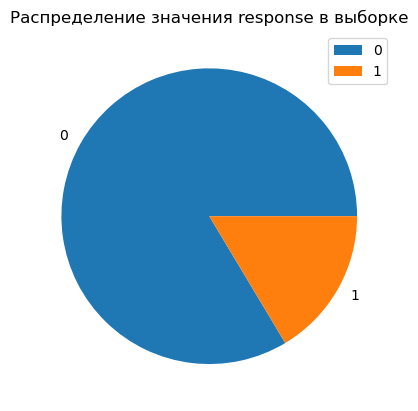

In [52]:
plt.pie(class_train[class_result].value_counts(), labels=(0, 1))
plt.title("Распределение значения response в выборке")
plt.legend((0, 1))
plt.show()

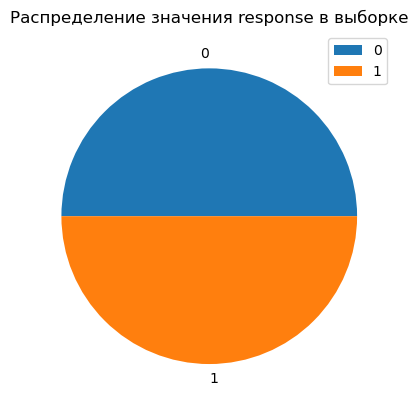

In [53]:
x = class_train[class_all]
y = class_train[class_result]
x, y = KMeansSMOTE(cluster_balance_threshold=0.3).fit_resample(x, y)
plt.pie(y.value_counts(), labels=(0, 1))
plt.title("Распределение значения response в выборке")
plt.legend((0, 1))
plt.show()

In [54]:

x_train_class, x_test_class, y_train_class, y_test_class = train_test_split(x, y, test_size=0.3, random_state=7)
x = regression_train[regression_all]
y = regression_train[regression_result]
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x, y, test_size=0.3, random_state=7)

построение ансамблей моделей

In [55]:
def get_best_score(best_scores, best_params, estimators=None):
    best_score = max(best_scores)
    best_id = best_scores.index(best_score)
    best_param = best_params[best_id]
    if estimators:
        print(f"Best n_estimators: {best_param}")
        print(f"Best estimator: {estimators[best_id]}")
    else:
        print(f"Best estimators combination: {best_param}")
    print(f"Score: {round(best_score, 3)}")
    return best_score


def plot_single_graph(parameters, estimator_name, ax, train_acc, test_acc, regression=False):
    ax.plot(parameters, train_acc, label="Train")
    ax.plot(parameters, test_acc, label="Test")
    ax.set_xlabel("n_estimators", labelpad=15)
    ax.set_title(estimator_name)
    print(regression)
    ax.set_ylabel("ROC-AUC", labelpad=15) if not regression else ax.set_ylabel("R^2", labelpad=15)
    ax.legend()

def test_models(estimators, parameters, x_train, y_train, x_test, y_test, is_bagg=True, is_regression=False):
    train_acc = {}
    test_acc = {}
    best_scores = []
    best_params = []
    for estimator in estimators:
        train_acc[str(estimator)] = []
        test_acc[str(estimator)] = []
        for parameter in parameters["n_estimators"]:
            model_cls = BaggingClassifier if is_bagg else AdaBoostClassifier
            if is_regression:
                model_cls = BaggingRegressor if is_bagg else AdaBoostRegressor
            model = model_cls(estimator, n_estimators=parameter, random_state=42)
            model.fit(x_train, y_train)
            train_acc[str(estimator)].append(roc_auc_score(y_train, model.predict_proba(x_train)[:, 1])
                                              if not is_regression else model.score(x_train, y_train))
            test_acc[str(estimator)].append(roc_auc_score(y_test, model.predict_proba(x_test)[:, 1]) 
                                            if not is_regression else model.score(x_test, y_test))
        best_scores.append(max(test_acc[str(estimator)]))
        best_id = test_acc[str(estimator)].index(best_scores[-1])
        best_params.append(parameters["n_estimators"][best_id])
    build_parameters_graph(parameters["n_estimators"], train_acc, test_acc, estimators)
    return get_best_score(best_scores, best_params, estimators)


def build_parameters_graph(parameters, train_score, test_score, estimators, is_regression=False):
    fig, axs = plt.subplots(ncols=3, figsize=(20, 7))
    fig.subplots_adjust(hspace=0.4)
    for i, estimator in enumerate(estimators):
        plot_single_graph(parameters, str(estimator), axs[i], train_score[str(estimator)], test_score[str(estimator)], regression=is_regression)
    plt.show()

def create_stacking_model(estimators, x_train, y_train, x_test, y_test, sample_len=3, samples_cnt=5, is_regression=False):
    new_combinations = list(combinations(estimators, sample_len))
    names = []
    train = []
    test = []
    used_combinations = []
    for _ in range(samples_cnt):
        combination, used_combinations = get_new_combinations(
            new_combinations, used_combinations)
        if not is_regression:
            model = StackingClassifier(combination)
            model.fit(x_train, y_train)
            y_pred_train = model.predict_proba(x_train)[:, 1]
            y_pred_test = model.predict_proba(x_test)[:, 1]
            train.append(roc_auc_score(y_train, y_pred_train))
            test.append(roc_auc_score(y_test, y_pred_test))
        else:
            model = StackingRegressor(combination,
                                      final_estimator=RandomForestRegressor())
            model.fit(x_train, y_train)
            train.append(model.score(x_train, y_train))
            test.append(model.score(x_test, y_test))
        name = ""
        for item, _ in combination:
            name += item + " "
        names.append(name)
    build_stacking_graph(names, train, test)
    return get_best_score(test, names)

def get_new_combinations(combinations, used):
    numb = random.randint(0, len(combinations) - 1)
    while numb in used:
        numb = random.randint(0, len(combinations) - 1)
    used.append(numb)
    combination = list(combinations[numb])
    return combination, used

def build_stacking_graph(comb_names, train_scores, test_scores):
    fig, ax = plt.subplots()
    fig.suptitle("Stacking")
    x = np.arange(len(comb_names))
    width = 0.35
    ax.bar(x - width/2, train_scores, width, label='Train')
    ax.bar(x + width/2, test_scores, width, label='Test')
    ax.set_xticks(x)
    ax.set_xticklabels(comb_names, rotation=90)
    ax.set_xlabel("Model Combinations")
    ax.set_ylabel("Score")
    ax.legend()
    plt.tight_layout()
    plt.show()


классификация

бэггинг

False
False
False


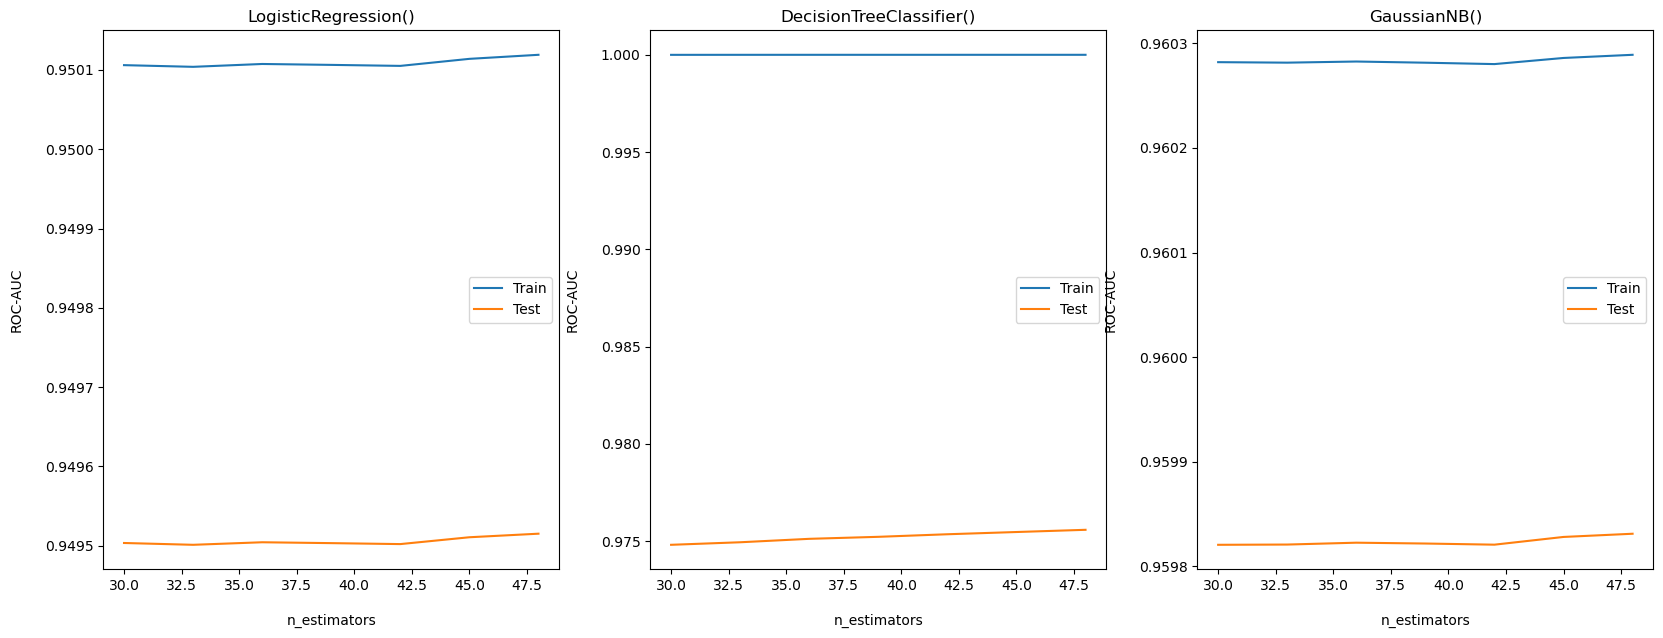

Best n_estimators: 48
Best estimator: DecisionTreeClassifier()
Score: 0.976


In [56]:

parameters = {
    "n_estimators": range(30, 50, 3)
}
estimators = [LogisticRegression(), DecisionTreeClassifier(), GaussianNB()]
score_bg_c = test_models(estimators, parameters, x_train_class, y_train_class, x_test_class, y_test_class, is_bagg=True)

бустинг

False
False
False


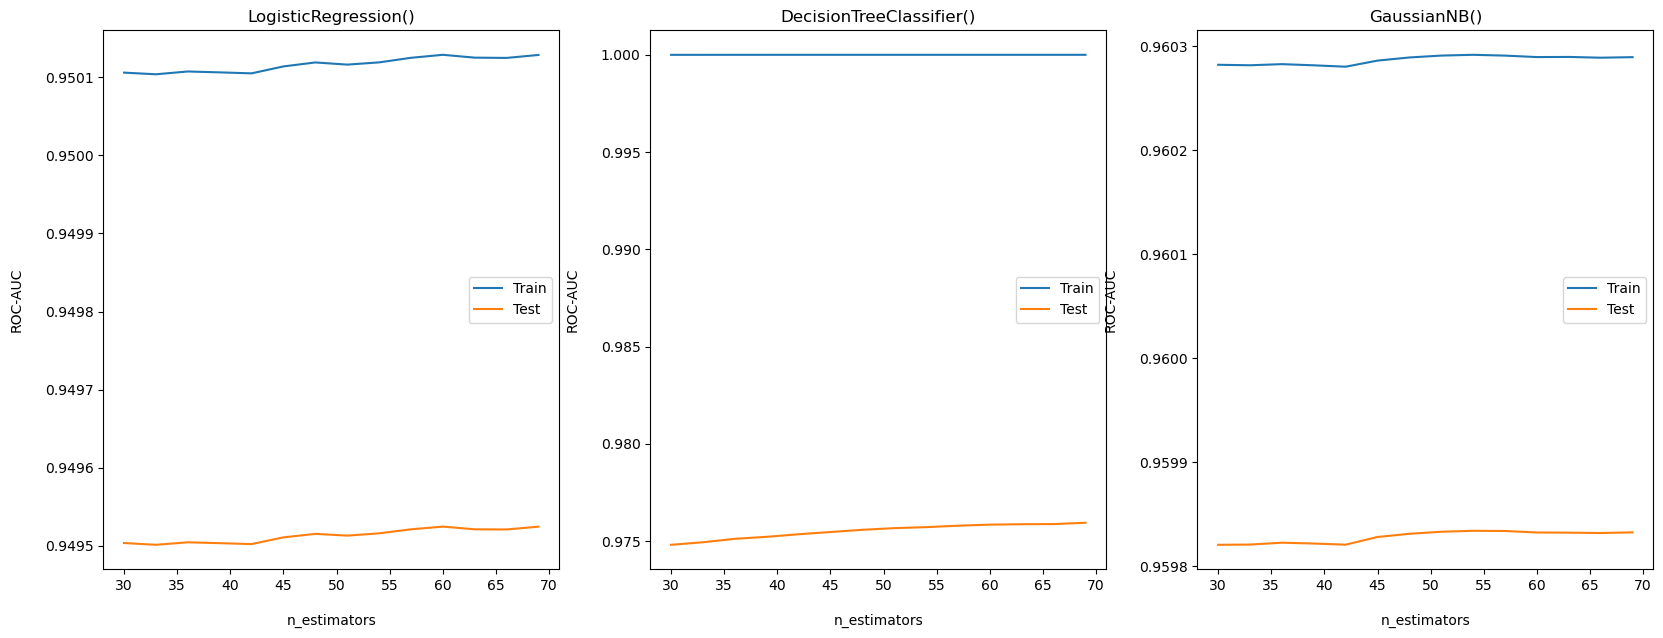

Best n_estimators: 69
Best estimator: DecisionTreeClassifier()
Score: 0.976


In [57]:
parameters = {
    "n_estimators": range(30, 70, 3)
}
estimators = [LogisticRegression(), DecisionTreeClassifier(), GaussianNB()]
score_bs_c = test_models(estimators, parameters, x_train_class, y_train_class, x_test_class, y_test_class)


стэкинг

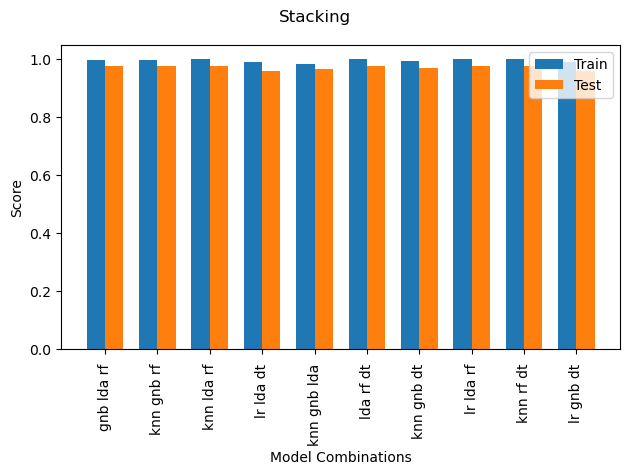

Best estimators combination: knn gnb rf 
Score: 0.977


In [58]:
estimators = [
    ('knn', KNeighborsClassifier()),
    ('lr', LogisticRegression()),
    ('gnb', GaussianNB()),
    ('lda', LinearDiscriminantAnalysis()),
    ('rf', RandomForestClassifier()),
    ('dt', DecisionTreeClassifier())
]

score_s_c = create_stacking_model(estimators, x_train_class, y_train_class, x_test_class, y_test_class, samples_cnt=10)

регрессия

бэггинг 

False
False
False


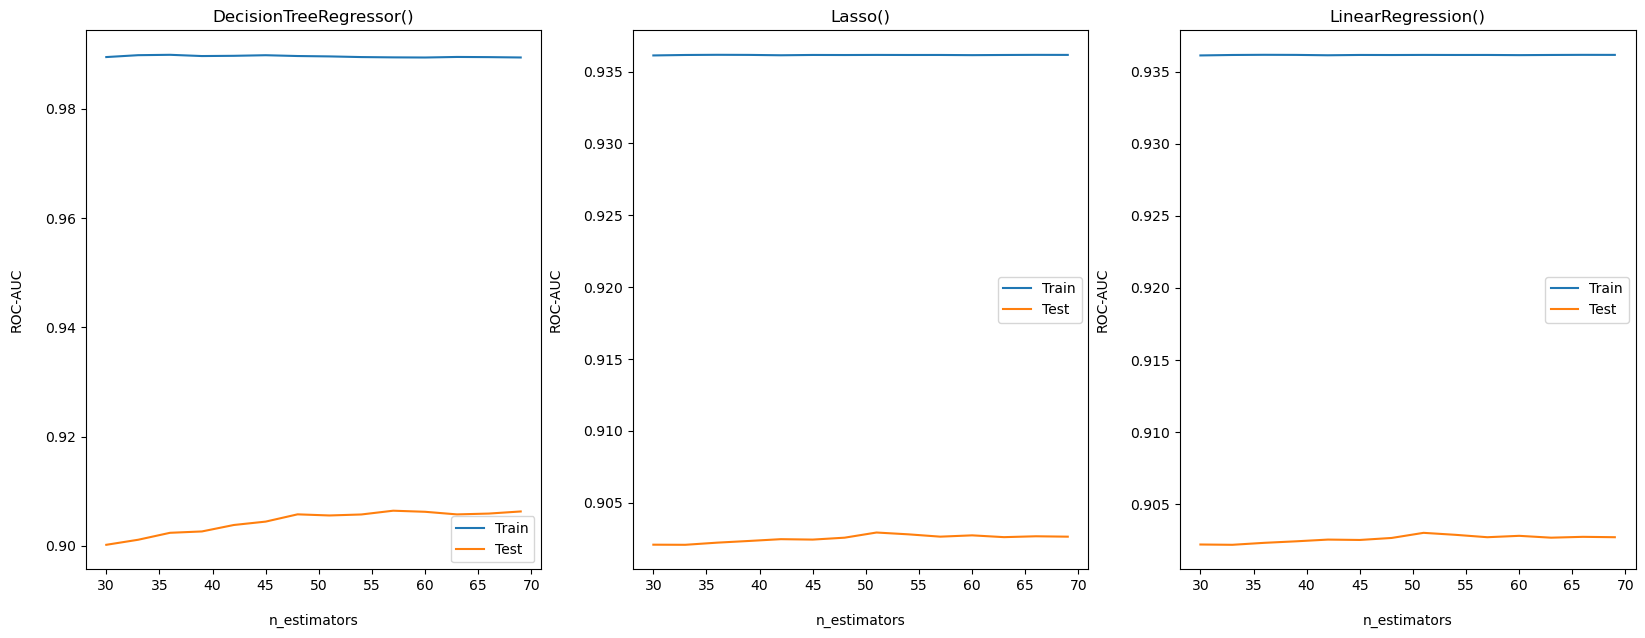

Best n_estimators: 57
Best estimator: DecisionTreeRegressor()
Score: 0.906


In [59]:
estimators = [DecisionTreeRegressor(), Lasso(), LinearRegression()]
score_bg_r = test_models(estimators, parameters, x_train_reg, y_train_reg, x_test_reg, y_test_reg, is_bagg=True, is_regression=True)

бустинг

False
False
False


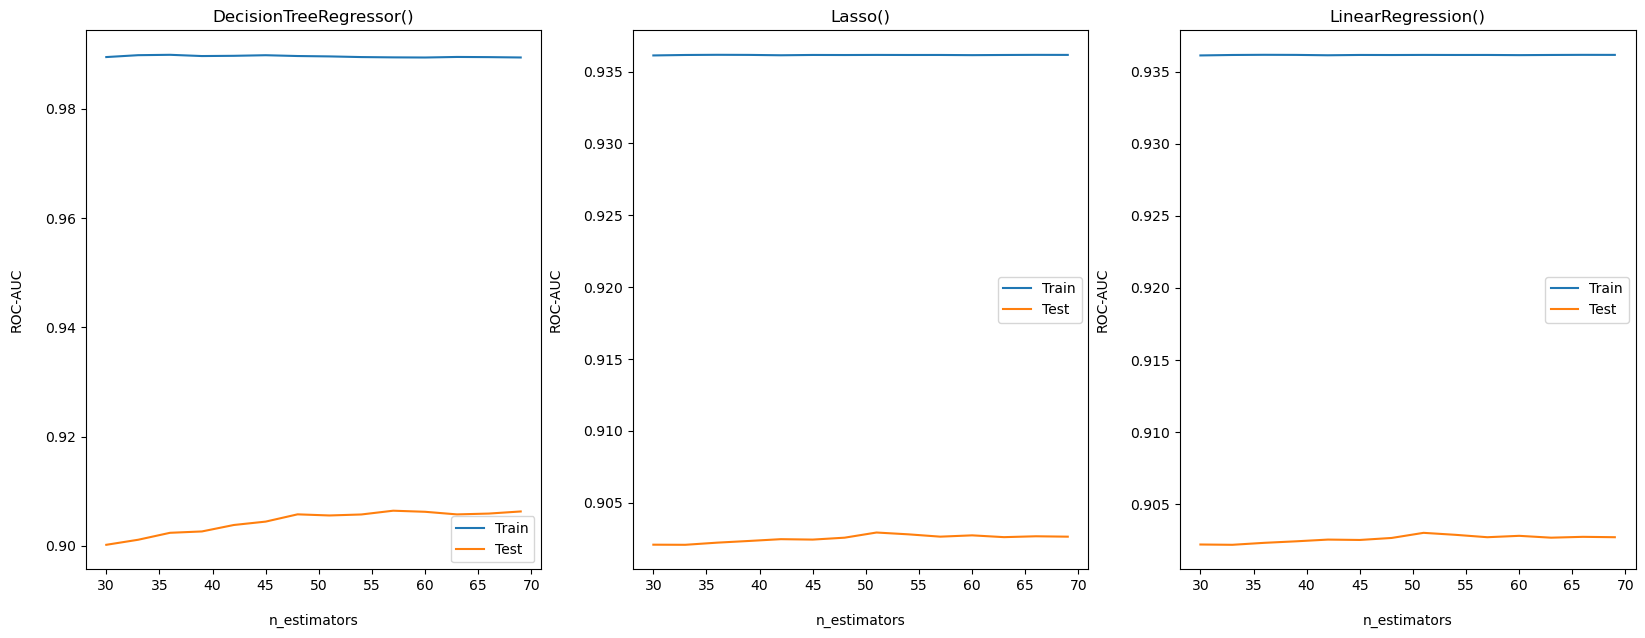

Best n_estimators: 57
Best estimator: DecisionTreeRegressor()
Score: 0.906


In [60]:
score_bs_r = test_models(estimators, parameters, x_train_reg, y_train_reg,
                         x_test_reg, y_test_reg, is_regression=True)

стэкинг

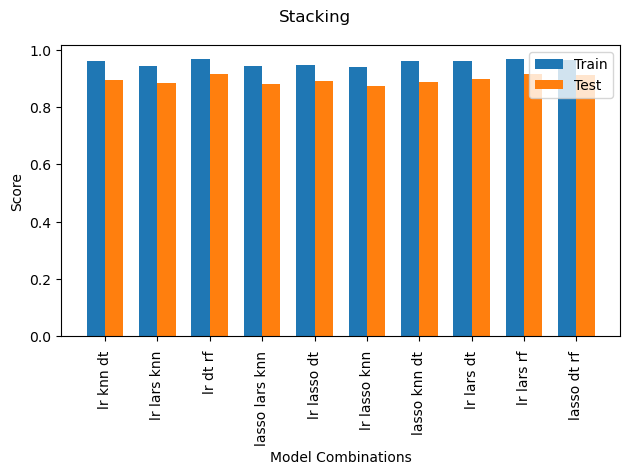

Best estimators combination: lr dt rf 
Score: 0.916


In [61]:
estimators = [
    ('lr', LinearRegression()),
    ('lasso', Lasso()),
    ('lars', Lars()),
    ('knn', KNeighborsRegressor()),
    ('dt', DecisionTreeRegressor()),
    ('rf', RandomForestRegressor())
]
score_s_r = create_stacking_model(estimators, x_train_reg, y_train_reg,
                                  x_test_reg, y_test_reg, is_regression=True, samples_cnt=10)

In [62]:
models_class = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier()
}

models_reg = {
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor()
}

results_class = {}
results_reg = {}

for name, model in models_class.items():
    model.fit(x_train_class, y_train_class)
    y_pred_train = model.predict(x_train_class)
    y_pred_test = model.predict(x_test_class)
    train_accuracy = accuracy_score(y_train_class, y_pred_train)
    test_accuracy = accuracy_score(y_test_class, y_pred_test)
    results_class[name] = {'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy}

for name, model in models_reg.items():
    model.fit(x_train_reg, y_train_reg)
    y_pred_train = model.predict(x_train_reg)
    y_pred_test = model.predict(x_test_reg)
    train_r2 = r2_score(y_train_reg, y_pred_train)
    test_r2 = r2_score(y_test_reg, y_pred_test)
    results_reg[name] = {'train_r2': train_r2, 'test_r2': test_r2}


In [77]:
print(results_class)
print(results_reg)

{'RandomForest': {'train_accuracy': 0.999936647300616, 'test_accuracy': 0.9031416571741607}, 'GradientBoosting': {'train_accuracy': 0.901229415030987, 'test_accuracy': 0.8997852229941827}}
{'RandomForest': {'train_r2': 0.9901840011613572, 'test_r2': 0.9076118419073582}, 'GradientBoosting': {'train_r2': 0.9804777345257606, 'test_r2': 0.9098262949333354}}


In [78]:
class_models = pd.DataFrame(
    {
        "Model name": ["Логистическая регрессия", "Метод Ближайших Соседей", "Наивный Байесовский Классификатор", "Линейный Дискриминантный Анализ",
                         "Квадратичный Дискриминантный Анализ", "Машина Опорных Векторов", "Деревья решений", "Cлучайный лес", "Градиентный бустинг"],
        "Score": [0.811, 0.768, 0.812, 0.812, 0.814, 0.876, 0.871, 0.904, 0.877],
    }
)


In [79]:
regression_models = pd.DataFrame(
    {
        "Model name": ["Линейная регрессия", "Лассо регрессия", "Гребневая регрессия", "Elastic-Net", "Метод наименьших углов",
                       "Байесовская регрессия", "Обобщённая линейная регрессия", "Взвешенный МНК", "Полиномиальная регрессия",
                       "Непараметрическая регрессия", "Сплайновая регрессия", "Деревья решений", "Cлучайный лес", "Градиентный бустинг"],
        "R^2": [0.897, 0.898, 0.898, 0.888, 0.897, 0.898, 0.880, 0.878, 0.892, 0.696, 0.880, 0.845, 0.908, 0.909],
    }
)

In [80]:
class_models.loc[len(class_models.index)] = ["Бэггинг", round(score_bg_c, 3)]
class_models.loc[len(class_models.index)] = ["Бустинг", round(score_bs_c, 3)]
class_models.loc[len(class_models.index)] = ["Стеккинг", round(score_s_c, 3)]
print(class_models)


                             Model name  Score
0               Логистическая регрессия  0.811
1               Метод Ближайших Соседей  0.768
2     Наивный Байесовский Классификатор  0.812
3       Линейный Дискриминантный Анализ  0.812
4   Квадратичный Дискриминантный Анализ  0.814
5               Машина Опорных Векторов  0.876
6                       Деревья решений  0.871
7                         Cлучайный лес  0.904
8                   Градиентный бустинг  0.877
9                               Бэггинг  0.976
10                              Бустинг  0.976
11                             Стеккинг  0.977


In [81]:
regression_models.loc[len(regression_models.index)] = ["Бэггинг", round(score_bg_r, 3)]
regression_models.loc[len(regression_models.index)] = ["Бустинг", round(score_bs_r, 3)]
regression_models.loc[len(regression_models.index)] = ["Стеккинг", round(score_s_r, 3)]
print(regression_models)

                       Model name    R^2
0              Линейная регрессия  0.897
1                 Лассо регрессия  0.898
2             Гребневая регрессия  0.898
3                     Elastic-Net  0.888
4          Метод наименьших углов  0.897
5           Байесовская регрессия  0.898
6   Обобщённая линейная регрессия  0.880
7                  Взвешенный МНК  0.878
8        Полиномиальная регрессия  0.892
9     Непараметрическая регрессия  0.696
10           Сплайновая регрессия  0.880
11                Деревья решений  0.845
12                  Cлучайный лес  0.908
13            Градиентный бустинг  0.909
14                        Бэггинг  0.906
15                        Бустинг  0.906
16                       Стеккинг  0.916


In [82]:
def plot_bar_graph(ax, names, scoring, title):
    ax.bar(names, scoring)
    ax.set_title(title)
    ax.tick_params(axis="x", labelrotation=90)  
    ax.set_ylim((0.5, 1))
    for rect, score in zip(ax.patches, scoring):
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.01, score, ha="center")
    ax.set_xlabel("Модель", labelpad=15)
    ax.set_ylabel("Score", labelpad=15)

def compare_models():
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(25, 7))
    fig.subplots_adjust(hspace=0.4)
    plot_bar_graph(axs[0], regression_models["Model name"], regression_models["R^2"], "Регрессии")
    plot_bar_graph(axs[1], class_models["Model name"], class_models["Score"], "Классификации")


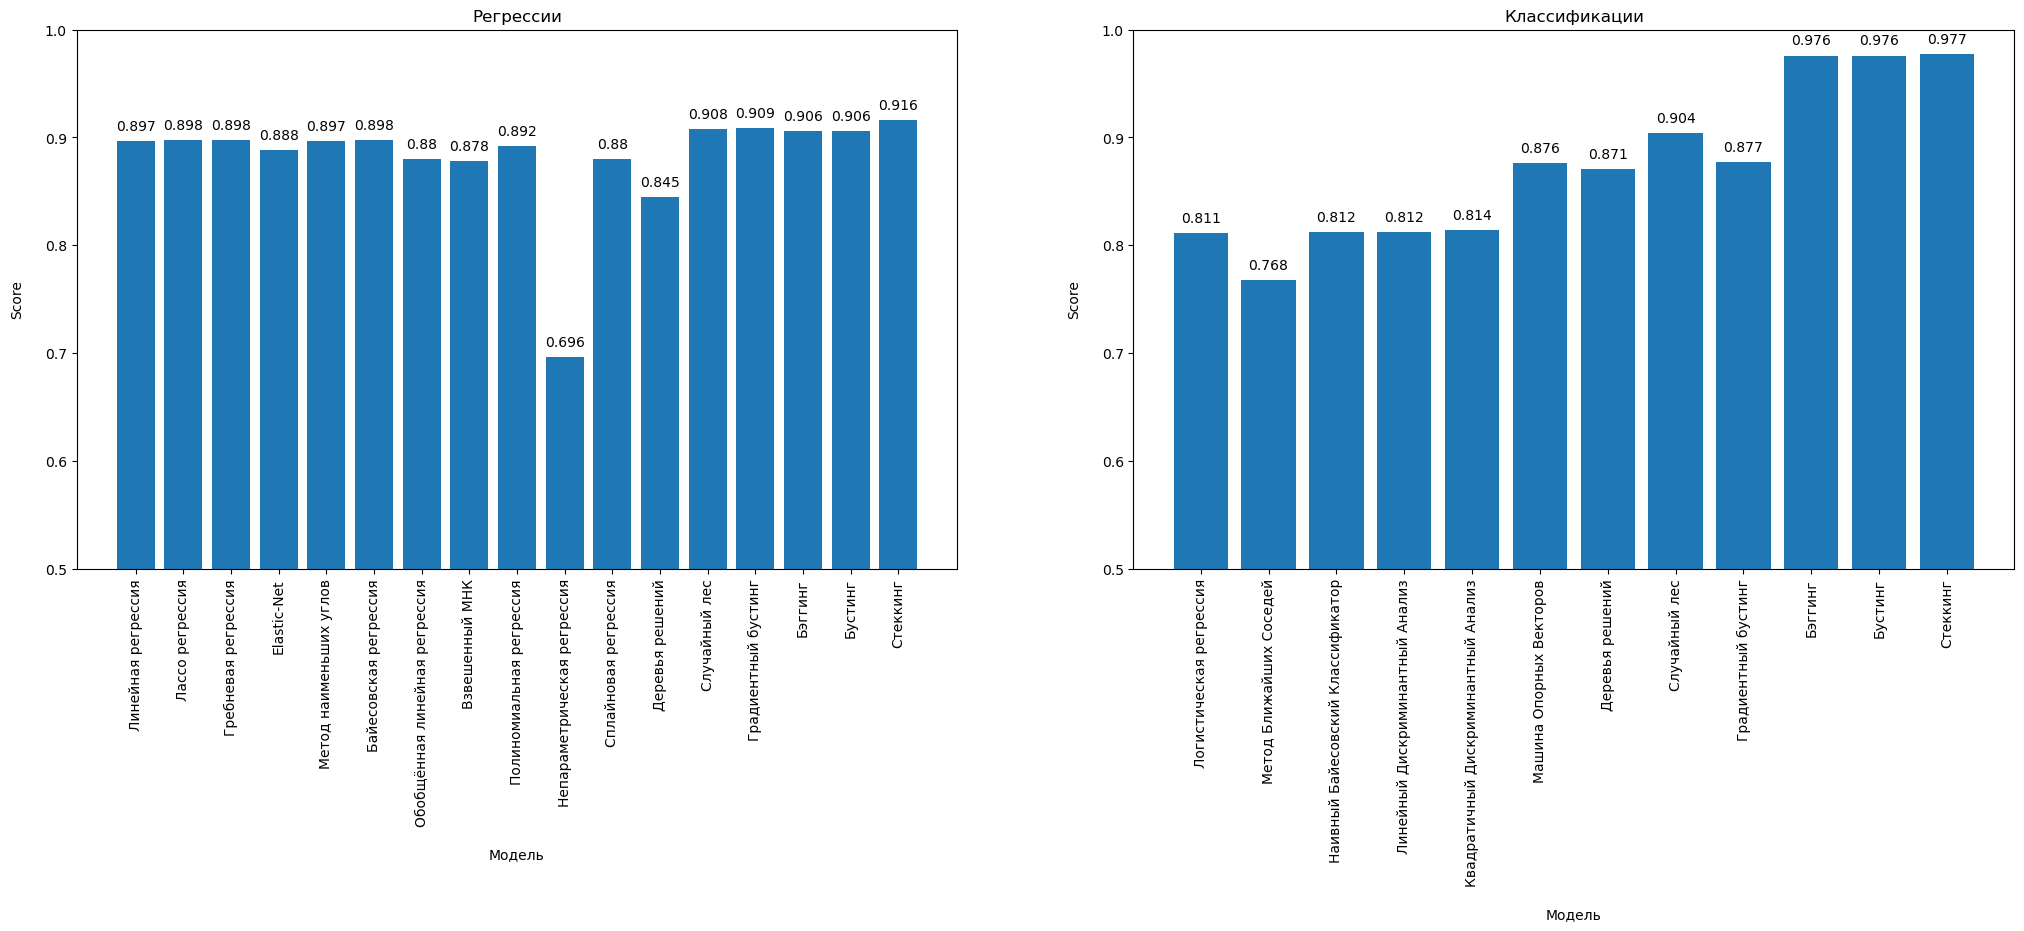

In [83]:
compare_models()

In [70]:

def create_stacking_model(estimators, x_train, y_train, is_regression=False):
    if not is_regression:
        model = StackingClassifier(estimators)
    else:
        model = StackingRegressor(estimators, final_estimator=RandomForestRegressor())
    model.fit(x_train, y_train)
    return model

estimators_reg = [('lasso', Lasso()), ('lars', Lars()), ('rf', RandomForestRegressor())]
estimators_class = [('knn', KNeighborsRegressor()), ('lr', LogisticRegression()), ('rf', RandomForestClassifier())]

best_model_reg = create_stacking_model(estimators_reg, x_train_reg, y_train_reg, is_regression=True)
best_model_class = create_stacking_model(estimators_class, x_train_class, y_train_class)

class_test = class_test[class_all]
y_pred_class = best_model_class.predict(class_test)

submission_class = pd.DataFrame({'id': ids_class, 'Response': y_pred_class})

submission_class.to_csv('submission_class.csv', index=False)
print("Файл submission_class.csv сохранен.")

regression_test = regression_test[regression_all]
y_pred_reg = best_model_reg.predict(regression_test)

submission_reg = pd.DataFrame({'id': ids_reg, 'Цена': y_pred_reg})

submission_reg.to_csv('submission_reg.csv', index=False)
print("Файл submission_reg.csv сохранен.")


Файл submission_class.csv сохранен.
Файл submission_reg.csv сохранен.
